<a href="https://colab.research.google.com/github/mk22118/Offensive-Language-detection-in-social-media/blob/main/807_assignment2_mk22118_2201597_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Reading and Data Presprocessing**

In [1]:
#Importing libraries for solving the given problem
# import the standard libraries to access file
import numpy as np
import pandas as pd
import os
import io 
import pickle

import matplotlib.pyplot as plt
#import libraries for cleaning data
import re
import nltk
import string
#import libraries for preprocessing the data
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

#from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
# import libraries to model training testing validating
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

#import libraries for plotting the graph
from matplotlib import pyplot
 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# The sequence of numbers generated is the same every time a code is run
seed= np.random.seed(2201597)  
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# initialize GDrive and data and models paths

GOOGLE_DRIVE = os.path.join('./CE807/Assignment2/',str(2201597)) 
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))


List files:  ['test.csv', 'valid.csv', 'train.csv', '.ipynb_checkpoints', 'models', 'train_25.csv', 'train_75.csv', 'train_50.csv', '807_assignment2 _mk22118.ipynb']


In [4]:
# All the files are read train,test and valid from the google drive

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv') 
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv') 
valid_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv') 
# the read files are stored in the variable
df_train = pd.read_csv(train_file)
df_test =pd.read_csv(test_file)
df_valid=pd.read_csv(valid_file)
df_train.head()
# info() gives the information about the data frame, the number of null count.
print(df_train.shape)
df_train.info() # There are zero non-null count

(12313, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB


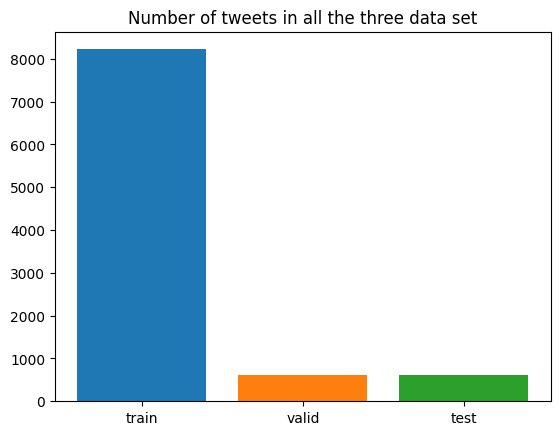

In [5]:
# check in the data set the proportional ratios of label (NOT and OFF) reponses 

#plt.bar(df_train['label'], color='blue')
x_labels = ["train", "valid", "test"]

plt.bar("train", df_train['label'].value_counts() , label="train")
plt.bar("valid", df_valid['label'].value_counts() , label="valid")
plt.bar("test", df_test['label'].value_counts() , label="test")
plt.title("Number of tweets in all the three data set")
plt.show()
# result shows uneven responses

Not offensive words 8221
offensive word counts 4092
Not offensive words 620
offensive word counts 240
Not offensive words 619
offensive word counts 308


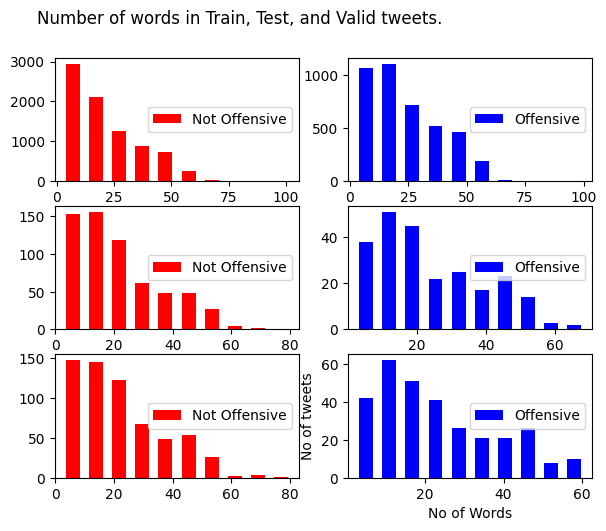

In [6]:
# Word count
def words_count_all(df,i):
  def words_count(phrases):
      words= phrases.split()
      word_cnt = len(words)
      return word_cnt
  df['word_cnt'] = df_train['tweet'].apply(words_count)


  #graphs representing number of wrds in tweets.
  ax[i][0].hist(df[df['label'] == 'NOT']['word_cnt'], label='Not Offensive', color='red', rwidth=0.6);
  print('Not offensive words',(df[df['label'] == 'NOT']['word_cnt']).count())
  ax[i][0].legend(loc='right');

  ax[i][1].hist(df[df['label'] == 'OFF']['word_cnt'], label='Offensive', color='blue', rwidth=0.6);
  print('offensive word counts',(df[df['label'] == 'OFF']['word_cnt']).count())
  ax[i][1].legend(loc='right');

  fig.suptitle(f"Number of words in Train, Test, and Valid tweets. ")
  plt.xlabel('No of Words')
  plt.ylabel('No of tweets')
# plot the information of number of words in the tweets. 
fig, ax = plt.subplots(3,2, figsize=(5,6)) 
plt.subplots_adjust(bottom=0.2, right=1.2, top=0.9)
words_count_all(df_train,0)
words_count_all(df_test,1)
words_count_all(df_valid,2)
plt.show()

In [7]:
from nltk.corpus.reader.tagged import word_tokenize
nltk.download('punkt')
# cleaning data train tweets
#Pre-processing the text, removing stop words, removing non-alphabetical words
# the process need to be done for all the tweets
def preprocessing(df):
  text = []

  for  i in range(len(df['tweet'])):  
    
  #Pre-processing the text, removing stop words, removing non-alphabetical words
    tweets = re.sub(r'([@][USER]+)+',' ',df['tweet'][i])
  #  tweet1 = re.sub(r'[^a-zA-Z0-9./?!,¿]+',' ',df['tweet'][i]).lower()
    tweet1 = re.sub(r'[^a-zA-Z0-9./?!,¿]+',' ',tweets).lower()
    tweet1 = re.sub(r'[!]+','', tweet1)
  # remove html breakline ie br br from data1 
    tweet_new = re.sub(r'\bbr\b\s+', '',tweet1) 

  #set stopwords to english

    lemmatizer = WordNetLemmatizer() # calling Lemmatisation method from nltk for grouping the inflected forms of word
    stop_wrd=set(stopwords.words('english'))
  #print(stop_wrd)
  # tokenize the tweets for further processing
    
    tweet_new=word_tokenize(tweet_new)
 
    tweet_new = [word.lower() for word in tweet_new if word.lower() not in stop_wrd] #removing stopwords

  #convert the word to its meaningful base form-lemmatize   (or can use # stemming is important for sentiment analysis because it is important to know the word is positive or negative by getting base word.
  # remove few character from word)
        
    tweet_new = [lemmatizer.lemmatize(word) for word in tweet_new]  
    tweet_new = " ".join(tweet_new)
    text.append(tweet_new)

  df_rev=list(zip(text,df['label']))  # removed id ,df['id'] 
  new_data=pd.DataFrame(df_rev, columns=['tweet','label'])  # 'id',
  return(new_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#Preprocessed output train, test, and valid data sets
data_set=[df_train,df_test,df_valid]
pro_data_set=[]
for file in data_set:
  new_file =preprocessing(file)
  pro_data_set.append(new_file)
#print(pro_data_set)
train_data=pro_data_set[0]
test_data=pro_data_set[1]
valid_data=pro_data_set[2]
print(test_data)



                                                 tweet label
0    whoisq wherestheserver dumpnike declasfisa dem...   OFF
1    constitutionday revered conservative , hated p...   NOT
2    foxnews nra maga potus trump 2ndamendment rnc ...   NOT
3    watching boomer getting news still parole alwa...   NOT
4    nopasaran unity demo oppose far right london a...   OFF
..                                                 ...   ...
855  despicabledems lie rifle . dem distorted law p...   OFF
856  meetthespeakers present event oiw 2018 finpact...   NOT
857  3 people unfollowed talking merlin sorry im st...   OFF
858  wednesdaywisdom antifa call right fascist , re...   NOT
859           kavanaugh typical liberal , democrat url   NOT

[860 rows x 2 columns]


In [9]:
#Creating 3 more sets of data which are subset of trainig data(1st 25%, 1st 50 % , and then 1st 75% of data)

train_25=train_data.iloc[:int(len(train_data)*0.25)]
train_25.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2201597/train_25.csv', index=False)
train_50=train_data.iloc[:int(len(train_data)*0.5)]
train_50.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2201597/train_50.csv', index=False)
train_75=train_data.iloc[:int(len(train_data)*0.75)]
train_75.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2201597/train_75.csv', index=False)
train_100=train_data.iloc[:int(len(train_data)*1)]
train_100.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2201597/train_75.csv', index=False)


<ipython-input-10-d52398031290>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_cnt'] = df_train['tweet'].apply(words_count)
<ipython-input-10-d52398031290>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_cnt'] = df_train['tweet'].apply(words_count)
<ipython-input-10-d52398031290>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Not offensive words 2035
offensive word counts 1043
Not offensive words 4141
offensive word counts 2015
Not offensive words 6176
offensive word counts 3058
Not offensive words 8221
offensive word counts 4092


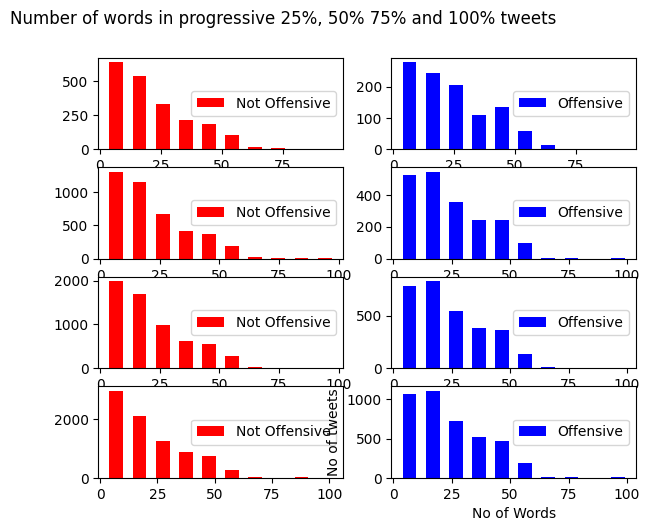

In [10]:
# for the table
def words_count_all(df,i):
  def words_count(phrases):
      words= phrases.split()
      word_cnt = len(words)
      return word_cnt
  df['word_cnt'] = df_train['tweet'].apply(words_count)
  

  ax[i][0].hist(df[df['label'] == 'NOT']['word_cnt'], label='Not Offensive', color='red', rwidth=0.6);
  print('Not offensive words',(df[df['label'] == 'NOT']['word_cnt']).count())
  ax[i][0].legend(loc='right');

  ax[i][1].hist(df[df['label'] == 'OFF']['word_cnt'], label='Offensive', color='blue', rwidth=0.6);
  print('offensive word counts',(df[df['label'] == 'OFF']['word_cnt']).count())
  ax[i][1].legend(loc='right');

  fig.suptitle(f"Number of words in progressive 25%, 50% 75% and 100% tweets ")
  plt.xlabel('No of Words')
  plt.ylabel('No of tweets')
# plot the information of number of words in the tweets. 
fig, ax = plt.subplots(4,2, figsize=(5,6)) 
plt.subplots_adjust(bottom=0.2, right=1.2, top=0.9)
words_count_all(train_25,0)
words_count_all(train_50,1)
words_count_all(train_75,2)
words_count_all(train_100,3)
plt.show()

## **Task 2** models  vectorised and tested 

In [11]:
#splitting tweets and label values
#vectorising the tweets 
vectorizer= CountVectorizer()
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer=TfidfVectorizer()
train_Y, test_Y, valid_Y =train_data['label'],test_data['label'],valid_data['label']
train_X , test_X, valid_X= train_data['tweet'],test_data['tweet'],valid_data['tweet']
Train_X =vectorizer.fit_transform(train_X)

Test_X=vectorizer.transform(test_X)
Valid_X=vectorizer.transform(valid_X)
Test_X.shape



(860, 16587)

In [12]:
### **Model 1** 
# used Random Forest Classifier, Support Vector machine classifier  and 
#Model1 saved with the pickle
# path is created for saving in model 
model_dir= os.path.join(GOOGLE_DRIVE_PATH, 'models') # Model 1 directory
model1_dir=os.path.join(model_dir, '1')




In [13]:
# define vectorizer function for vectorizing the tweets 
# save the vectorizer model in the respective folder
def vectorz(xtr,xtx, str,fld):
  vectorizer= CountVectorizer()
  Train_X1=vectorizer.fit_transform(xtr)
  Test_X1=vectorizer.transform(xtx)
  model11_dir=os.path.join(model1_dir, fld)

  with open('model11_dir','wb') as f1:
    model11_file = os.path.join(model11_dir,str )
    pickle.dump(vectorizer, open(model11_file, 'wb'))
    print('List files: ', os.listdir(model11_dir))
#  #load the saved model1
#  with open(model1_file,'rb') as f1:
#    rfc_model=pickle.load(f1)


In [14]:
# calling vectorizing function to save files in respective folders
#vector file to be stored in the respective folder
train_X_25, train_X_50, train_X_75,train_X_100 =train_25['tweet'],train_50['tweet'],train_75['tweet'],train_100['tweet']
model1_dir=os.path.join(model_dir, '1')

Train_set_V=[[train_X_25,test_X,'Vecr_25','25'],[train_X_50,test_X,'Vecr_50','50'],[train_X_75,test_X,'Vecr_75','75'],[train_X_100,test_X,'Vecr_100','100']]
for s in Train_set_V:
  vectorz(s[0],s[1],s[2],s[3])
  vectorz(s[0],s[1],s[2],s[3])
model1_dir=os.path.join(model_dir, '2')
Train_set_V=[[train_X_25,test_X,'Vecr_25','25'],[train_X_50,test_X,'Vecr_50','50'],[train_X_75,test_X,'Vecr_75','75'],[train_X_100,test_X,'Vecr_100','100']]
for s in Train_set_V:
  vectorz(s[0],s[1],s[2],s[3])
  vectorz(s[0],s[1],s[2],s[3]) 


List files:  ['Vecr_25', 'rfc_model_25.sav', 'out_test.csv']
List files:  ['Vecr_25', 'rfc_model_25.sav', 'out_test.csv']
List files:  ['rfc_model_50.sav', 'Vecr_50', 'out_test.csv']
List files:  ['rfc_model_50.sav', 'Vecr_50', 'out_test.csv']
List files:  ['rfc_model_75.sav', 'Vecr_75', 'out_test.csv']
List files:  ['rfc_model_75.sav', 'Vecr_75', 'out_test.csv']
List files:  ['rfc_model_100.sav', 'Vecr_100', 'out_test.csv']
List files:  ['rfc_model_100.sav', 'Vecr_100', 'out_test.csv']
List files:  ['svm_model_25.sav', 'Vecr_25', 'out_test.csv']
List files:  ['svm_model_25.sav', 'Vecr_25', 'out_test.csv']
List files:  ['svm_model_50.sav', 'Vecr_50', 'out_test.csv']
List files:  ['svm_model_50.sav', 'Vecr_50', 'out_test.csv']
List files:  ['svm_model_75.sav', 'Vecr_75', 'out_test.csv']
List files:  ['svm_model_75.sav', 'Vecr_75', 'out_test.csv']
List files:  ['svm_model_100.sav', 'Vecr_100', 'out_test.csv']
List files:  ['svm_model_100.sav', 'Vecr_100', 'out_test.csv']


In [15]:
#Also vectorize all the tweets of progressive splitted data set(1st 25%, 1st 50 % , and then 1st 75% of data)
# tweets of progressive training data set are transformed in to vectorizer form
train_X_25, train_X_50, train_X_75,train_X_100 =train_25['tweet'],train_50['tweet'],train_75['tweet'],train_100['tweet']
Train_X_25=vectorizer.transform(train_X_25)
Train_X_50=vectorizer.transform(train_X_50)
Train_X_75=vectorizer.transform(train_X_75)
Train_X_100=vectorizer.transform(train_X_100)
train_Y_25, train_Y_50, train_Y_75, train_Y_100 =train_25['label'],train_50['label'],train_75['label'],train_100['label']


In [16]:
#works well with imbalanced datasets because it can automatically balance the classes by weighting the samples.
#Training Model1
def train_model1(Train_X,train_Y,mod2,fld):
  rfc_model1=RandomForestClassifier(n_estimators=500,random_state=seed) 
  rfc_model1.fit(Train_X,train_Y)
  model11_dir=os.path.join(model1_dir, fld)
  with open('model1_dir','wb') as f1:
    model11_file = os.path.join(model11_dir, mod2)
    pickle.dump(rfc_model1, open(model11_file, 'wb'))
    print('List files: ', os.listdir(model11_dir))
  #load the saved model1 in the respective folder
  with open(model11_file,'rb') as f1:
    rfc_model=pickle.load(f1)
  #validating the model on the saved model
  V_pred = rfc_model.predict(Valid_X)
  RFC_score_V=accuracy_score(valid_Y,V_pred)
  #now predict test data from the saved model
  # predicted outputs are stored in the respective folder
  rfc_out_label=rfc_model.predict(Test_X)
  f_path=f"{model11_dir}/out_test.csv"
  out_label1=pd.DataFrame(rfc_out_label)
  out_label1.to_csv(f_path,index=False)
  # return the values rfc_model, RFC_score_V,rfc_out_label for further refernce
  return rfc_model, RFC_score_V,rfc_out_label


In [17]:
# defined fumction for the random forest model for computing the performance 
# of the classifier(ramdom froest classifier)
def compute_performance_rfc(test_Y,Test_pred):
  rfc_model_accuracy=accuracy_score(test_Y,Test_pred)
  print("RFC accuracy score using rfc model:",rfc_model_accuracy)
  # confusion_matrix shows the model’s ability to correctly predict the labels
  out_label= Test_pred
  print(confusion_matrix(test_Y,out_label))
  print("\n",classification_report(test_Y,out_label))
  RFC_score_Acc=accuracy_score(test_Y,out_label)
  #'Computing different preformance metrics on'
  #Precision is the ratio of true positive predictions to the total number of positive predictions,
  # The F1 score is a measure of a classification model's accuracy
  f1score=f1_score(test_Y,Test_pred1, average='macro')
  acc = accuracy_score(test_Y,Test_pred)
  print('F1 Score(macro): ', f1score)
  print('Accuracy: ', acc)
  return acc, f1score


In [18]:
#Model2 saved with the pickle
# **** 2nd model trained and predicted valid output and the performance is no better tan RFC
model_dir= os.path.join(GOOGLE_DRIVE_PATH, 'models') # Model 1 directory
model2_dir=os.path.join(model_dir, '2')
# Linear support vector machines 
# Additional model for checking the performance
from sklearn.linear_model import SGDClassifier
svm2=SGDClassifier(loss='hinge',max_iter=500,random_state=42) # initialize the parameters of the svm classifier.
#fitting the svm , hinge’ gives a linear SVM , 500 are the maximum number of passes for training data,random_state=42 is used for shuffling the data
svm2_imdb=svm2.fit(Train_X,train_Y) # train the model using fit
svm2_predict=svm2.predict(Valid_X)
#print(svm_predict)
#accuracy score
svm2_score=accuracy_score(valid_Y,svm2_predict)
print("svm accuracy score :",svm2_score)


svm accuracy score : 0.7669902912621359


In [19]:
# another model trained and tested 
# performance is good but still less than RFC
# f_score expected is more
#SVM is a powerful algorithm that works well on imbalanced datasets
svm_model2 = SVC(kernel='linear', C=1, random_state=seed)
svm_model2.fit(Train_X,train_Y)
#Model2 saved with the pickle
model_dir= os.path.join(GOOGLE_DRIVE_PATH, 'models') # Model 1 directory
model2_dir=os.path.join(model_dir, '2')
with open('model2_dir','wb') as f1:
  svm_model_file = os.path.join(model2_dir, 'svm_model.sav')
  pickle.dump(svm_model2, open(svm_model_file, 'wb'))
print('List files: ', os.listdir(model2_dir))
#load the saved  svm_model 
with open(svm_model_file,'rb') as f1:
  svm_model=pickle.load(f1)
#validating the model
V_pred = svm_model.predict(Valid_X)
A_score_svm_model_V=accuracy_score(valid_Y,V_pred)
print("accuracy score svm_model :", A_score_svm_model_V)
# confusion_matrix shows the model’s ability to correctly predict the labels
#'Computing different preformance metrics on'
#Precision is the ratio of true positive predictions to the total number of positive predictions,
# The F1 score is a measure of a classification model's accuracy 
print(confusion_matrix(valid_Y,V_pred))
print("\n",classification_report(valid_Y,V_pred))

#now predict test data
out_label=svm_model.predict(Test_X)
svm_model_accuracy=accuracy_score(test_Y,out_label)
print("accuracy score for test  using svm_model:",svm_model)
# confusion_matrix shows the model’s ability to correctly predict the labels 
print(confusion_matrix(test_Y,out_label))
print("\n",classification_report(test_Y,out_label))


List files:  ['25', '50', '75', '100', 'svm_model.sav']
accuracy score svm_model : 0.7637540453074434
[[528  91]
 [128 180]]

               precision    recall  f1-score   support

         NOT       0.80      0.85      0.83       619
         OFF       0.66      0.58      0.62       308

    accuracy                           0.76       927
   macro avg       0.73      0.72      0.72       927
weighted avg       0.76      0.76      0.76       927

accuracy score for test  using svm_model: SVC(C=1, kernel='linear')
[[532  88]
 [109 131]]

               precision    recall  f1-score   support

         NOT       0.83      0.86      0.84       620
         OFF       0.60      0.55      0.57       240

    accuracy                           0.77       860
   macro avg       0.71      0.70      0.71       860
weighted avg       0.77      0.77      0.77       860



In [20]:
# from the above code snippet the svm performance is better ,
# function for svm model created
# called for different subset of data
def train_method2(Train_X,train_Y,modl,fld):
  svm_model2 = SVC(kernel='linear',C=1, random_state=seed)
  svm_model2.fit(Train_X,train_Y)
  #Model2 saved with the pickle

  model2_dir=os.path.join(model_dir, '2')
  model12_dir=os.path.join(model2_dir, fld)

  with open('model12_dir','wb') as f1:
    svm_model_file = os.path.join(model12_dir, modl)
    pickle.dump(svm_model2, open(svm_model_file, 'wb'))
    print('List files: ', os.listdir(model12_dir))
  #load the saved  svm_model 
  with open(svm_model_file,'rb') as f1:
    svm_model=pickle.load(f1)
  #validating the model
  V_pred = svm_model.predict(Valid_X)
  RFC_score_svm_model_V=accuracy_score(valid_Y,V_pred)
  print("RFC accuracy score svm_model :",RFC_score_svm_model_V)
  #now predict test data
  out_label=svm_model.predict(Test_X)
  out_label1=pd.DataFrame(out_label)
  f_path=f"{model12_dir}/out_test.csv"
  out_label1.to_csv(f_path,index=False)
  return svm_model,RFC_score_svm_model_V, out_label

In [21]:
# for evaluation of the model 
#f1 score is calculated on the predicted output
def compute_performance_svm(test_Y,Test_pred):
  svm_model_accuracy=accuracy_score(test_Y,Test_pred)
  print("RFC accuracy score for test  using svm_model:",svm_model_accuracy)
  # confusion_matrix shows the model’s ability to correctly predict the labels 
  print(confusion_matrix(test_Y,out_label))
  print("\n",classification_report(test_Y,out_label))
  #'Computing different preformance metrics on'
  #Precision is the ratio of true positive predictions to the total number of positive predictions,
  # The F1 score is a measure of a classification model's accuracy
  print('Computing different preformance metrics on')
  f1score=f1_score(test_Y,Test_pred, average='macro')
  acc = accuracy_score(test_Y,Test_pred)
      
  print('F1 Score(macro): ', f1score)
  print('Accuracy: ', acc)
  return acc,f1score


## **Task3**
Training on subset of data, Testing and predicting into progressive way

In [22]:
# calling the training model for each subst of the data
# model used is random forest a MODEL 1
# also performance function is called , which will evaluate the performance
# the f1 score and accuracy are listed for the plotting a graph
model1_dir=os.path.join(model_dir,'1')

valid_acc_rfc=[]
Test_accuracy_rfc=[]
F1_score_rfc=[]
Train_set=[[Train_X_25,train_Y_25,'rfc_model_25.sav','25'],[Train_X_50,train_Y_50,'rfc_model_50.sav','50'],
           [Train_X_75,train_Y_75,'rfc_model_75.sav','75'],[Train_X_100,train_Y_100,'rfc_model_100.sav','100']]
for sets in Train_set:
  model1_file1, valid_accuracy1,Test_pred1= train_model1(sets[0],sets[1],sets[2],sets[3])
  
  Test_accuracy1,F1_score1= compute_performance_rfc(test_Y,Test_pred1)
  valid_acc_rfc.append(valid_accuracy1)
  Test_accuracy_rfc.append(Test_accuracy1)
  F1_score_rfc.append(F1_score1)

List files:  ['Vecr_25', 'rfc_model_25.sav', 'out_test.csv']
RFC accuracy score using rfc model: 0.813953488372093
[[599  21]
 [139 101]]

               precision    recall  f1-score   support

         NOT       0.81      0.97      0.88       620
         OFF       0.83      0.42      0.56       240

    accuracy                           0.81       860
   macro avg       0.82      0.69      0.72       860
weighted avg       0.82      0.81      0.79       860

Computing different preformance metrics on
F1 Score(macro):  0.7200953628589329
Accuracy:  0.813953488372093
List files:  ['rfc_model_50.sav', 'Vecr_50', 'out_test.csv']
RFC accuracy score using rfc model: 0.8174418604651162
[[601  19]
 [138 102]]

               precision    recall  f1-score   support

         NOT       0.81      0.97      0.88       620
         OFF       0.84      0.42      0.57       240

    accuracy                           0.82       860
   macro avg       0.83      0.70      0.72       860
weighted av

Text(0.5, 1.0, 'Accuracy score of Valid data set for RFC Model')

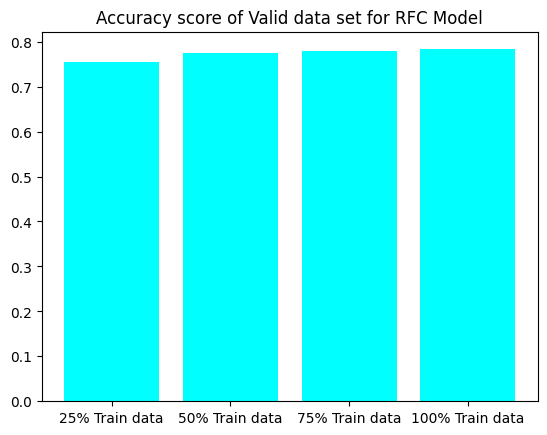

In [23]:
#plt.bar(df_train['label'], color='green')
x_labels = valid_acc_rfc
x= ['25% Train data','50% Train data','75% Train data','100% Train data']
plt.bar(x, x_labels,color='cyan')

plt.title("Accuracy score of Valid data set for RFC Model")

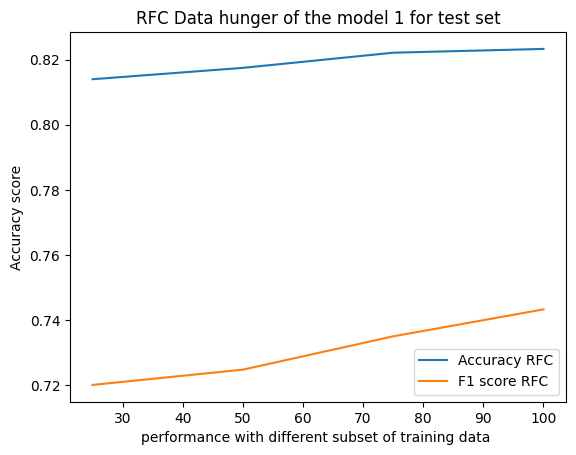

In [24]:
# Plot the two lines on the same graph of performance with different subset of training data (RFC)
x= [25,50,75,100]
# listed accuracy and fi score are assigned to y3 and y4
y1=Test_accuracy_rfc
y2=F1_score_rfc
# 2d graph os plotted, where the raise in the performance can be seen 
plt.plot(x, y1, label='Accuracy RFC')
plt.plot(x, y2, label='F1 score RFC')

# axis labels and a title
plt.xlabel('performance with different subset of training data ')
plt.ylabel('Accuracy score')
plt.title('RFC Data hunger of the model 1 for test set')
# legend to differentiate the two lines
plt.legend()
# Show the graph
plt.show()

In [25]:
# calling the training model for each subst of the data
# model used is support vector machine a MODEL 2
# also performance function is called , which will evaluate the performance
# the f1 score and accuracy are listed for the plotting a graph
model2_dir=os.path.join(model_dir,'2')
valid_acc_SVM=[]
Test_accuracy_svm=[]
F1_score_svm=[]
Train_set2=[[Train_X_25,train_Y_25,'svm_model_25.sav','25'],[Train_X_50,train_Y_50,'svm_model_50.sav','50'],
            [Train_X_75,train_Y_75,'svm_model_75.sav','75'],[Train_X_100,train_Y_100,'svm_model_100.sav','100']]
for set in Train_set2:
  model2_file, valid_accuracy, Test_pred2 =train_method2(set[0],set[1],set[2],set[3])
  Test_accuracy, F1_score = compute_performance_svm(test_Y,Test_pred2)
  valid_acc_SVM.append(valid_accuracy)
  Test_accuracy_svm.append(Test_accuracy)
  F1_score_svm.append(F1_score)



List files:  ['svm_model_25.sav', 'Vecr_25', 'out_test.csv']
RFC accuracy score svm_model : 0.7249190938511327
RFC accuracy score for test  using svm_model: 0.7662790697674419
[[532  88]
 [109 131]]

               precision    recall  f1-score   support

         NOT       0.83      0.86      0.84       620
         OFF       0.60      0.55      0.57       240

    accuracy                           0.77       860
   macro avg       0.71      0.70      0.71       860
weighted avg       0.77      0.77      0.77       860

Computing different preformance metrics on
F1 Score(macro):  0.6970976678658232
Accuracy:  0.7662790697674419
List files:  ['svm_model_50.sav', 'Vecr_50', 'out_test.csv']
RFC accuracy score svm_model : 0.7400215749730313
RFC accuracy score for test  using svm_model: 0.7697674418604651
[[532  88]
 [109 131]]

               precision    recall  f1-score   support

         NOT       0.83      0.86      0.84       620
         OFF       0.60      0.55      0.57       24

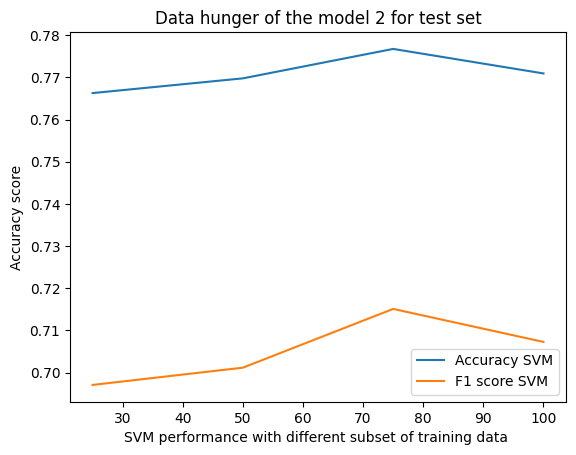

In [26]:
# Plot the two lines on the same graph of performance with different subset of training data SVM
x= [25,50,75,100]
# listed accuracy and fi score are assigned to y3 and y4
y3=Test_accuracy_svm #[0:-1]
y4=F1_score_svm #[0:-1]
# 2d graph os plotted, where the raise in the performance can be seen 
plt.plot(x, y3, label='Accuracy SVM')
plt.plot(x, y4, label='F1 score SVM')

# Add axis labels and a title
plt.xlabel('SVM performance with different subset of training data ')
plt.ylabel('Accuracy score')
plt.title('Data hunger of the model 2 for test set')
# Add a legend to differentiate the two lines
plt.legend()
# Show the graph
plt.show()

